# Recurrent NN

In [ ]:
KO_df.dropna()

In [4]:
import pandas as pd ##adapted from https://towardsdatascience.com/time-series-forecasting-with-recurrent-neural-networks-74674e289816
import numpy as np

AAPL_df = pd.read_csv("AAPL.csv") ##apple
AAPL_df = AAPL_df.iloc[::-1]
TSLA_df = pd.read_csv("TSLA.csv") ##tesla
TSLA_df = TSLA_df.iloc[::-1]
KO_df = pd.read_csv("KO.csv") ##coca cola
KO_df = KO_df.iloc[::-1]
print(KO_df)

            Date Close/Last    Volume    Open     High      Low
1258  11/13/2017     $46.72   7640384   $46.6  $46.815   $46.54
1257  11/14/2017     $47.43  17198680  $46.71   $47.48   $46.62
1256  11/15/2017     $46.81  12409620  $47.32   $47.46   $46.78
1255  11/16/2017     $46.55  12506160  $46.95   $46.98   $46.51
1254  11/17/2017     $45.71  19715450  $46.34   $46.38   $45.25
...          ...        ...       ...     ...      ...      ...
4     11/07/2022     $59.49   8849704  $59.26   $59.77   $59.24
3     11/08/2022      $59.6  10081650  $59.75   $59.79   $58.94
2     11/09/2022     $58.77  10115160  $59.59   $59.64  $58.751
1     11/10/2022     $60.88  16804850  $60.25   $61.04   $59.68
0     11/11/2022     $61.32  18972080  $61.37   $61.45   $60.21

[1259 rows x 6 columns]


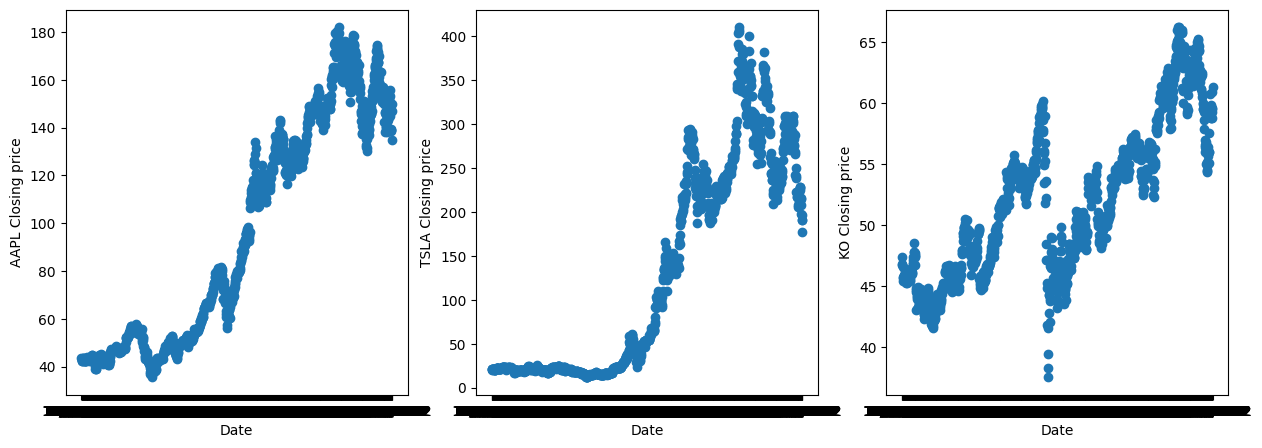

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
fig, axs = plt.subplots(nrows=1,ncols=3,figsize=(15,5)) #lets try plot these
axs[0].scatter(AAPL_df["Date"],AAPL_df["Close/Last"].str.replace('$', '').astype("float"))
axs[0].set_xlabel("Date")
axs[0].set_ylabel("AAPL Closing price")
axs[1].scatter(TSLA_df["Date"],TSLA_df["Close/Last"].str.replace('$', '').astype("float"))
axs[1].set_xlabel("Date")
axs[1].set_ylabel("TSLA Closing price")
axs[2].scatter(KO_df["Date"],KO_df["Close/Last"].str.replace('$', '').astype("float"))
axs[2].set_xlabel("Date")
axs[2].set_ylabel("KO Closing price")
plt.show()

In [5]:
X = np.zeros((len(KO_df),3)) ##make array to hold data
X[:,0] = AAPL_df["Close/Last"].str.replace('$', '').astype("float") ##remove dollart sign, convert to float
X[:,1] = KO_df["Close/Last"].str.replace('$', '').astype("float")
X[:,2] = TSLA_df["Close/Last"].str.replace('$', '').astype("float")
print(X)

[[ 43.4925  46.72    21.0267]
 [ 42.835   47.43    20.58  ]
 [ 42.27    46.81    20.7533]
 ...
 [134.87    58.77   177.59  ]
 [146.87    60.88   190.72  ]
 [149.7     61.32   195.97  ]]


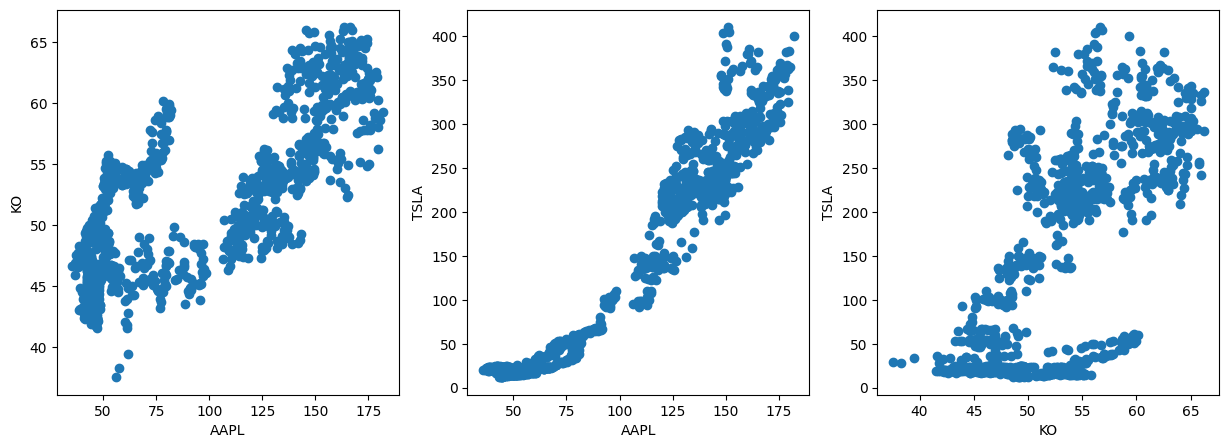

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
fig, axs = plt.subplots(nrows=1,ncols=3,figsize=(15,5)) #lets try plot these
axs[0].scatter(X[:,0],X[:,1])
axs[0].set_xlabel("AAPL")
axs[0].set_ylabel("KO")
axs[1].scatter(X[:,0],X[:,2])
axs[1].set_xlabel("AAPL")
axs[1].set_ylabel("TSLA")
axs[2].scatter(X[:,1],X[:,2])
axs[2].set_xlabel("KO")
axs[2].set_ylabel("TSLA")
plt.show()

In [6]:
from sklearn.preprocessing import MaxAbsScaler #scale again
scaler = MaxAbsScaler() ##scale columns to 0-1
scaler.fit(X) ##create scaler object
X_scaled = scaler.transform(X) #apply to all data
train_period = np.floor(0.8*len(X)).astype('int') ###since it's time series, use first 4 of 5 years as train
X_train = X_scaled[:train_period,:] #test-train split, be careful to formulate as predict next day of stock
X_test = X_scaled[train_period:-1,:]
Y_train = X_scaled[1:train_period+1,0]
Y_test = X_scaled[train_period+1:,0]

In [7]:
# from keras.preprocessing.sequence import TimeseriesGenerator

from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
look_back = 32 ## use last 32 days to predict next day

train_generator = TimeseriesGenerator(X_train, Y_train, length=look_back) #chop into 32 day chunks
test_generator = TimeseriesGenerator(X_test, Y_test, length=look_back)


#*LSTM version*#


In [13]:
## LSTM version
import tensorflow as tf
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.LSTM(32,return_sequences=True)) ##put in LSTM
model.add(tf.keras.layers.LSTM(64,return_sequences=False))
model.add(tf.keras.layers.Dense(64,activation='tanh')) #dense layers
# model.add(tf.keras.layers.Dense(32))
model.add(tf.keras.layers.Dense(1,activation='tanh')) #single predicted value
opt = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(optimizer=opt, loss='mse')
model.summary() #show number of parameters

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [14]:
model.fit(train_generator, validation_data=test_generator, epochs=50)


Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 0.3239 - val_loss: 0.0326
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0309 - val_loss: 0.0278
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0085 - val_loss: 0.0260
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0021 - val_loss: 0.0039
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0024 - val_loss: 0.0030
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0027 - val_loss: 0.0041
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0014 - val_loss: 0.0049
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0021 - val_loss: 0.0075
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0011 - val_loss: 0.0066
Epoch 10/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0013 - val_loss: 0.0059
Epoch 11/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0012 - val_loss: 0.0050
Epoch 12/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0014 - val_loss: 0.0058
E

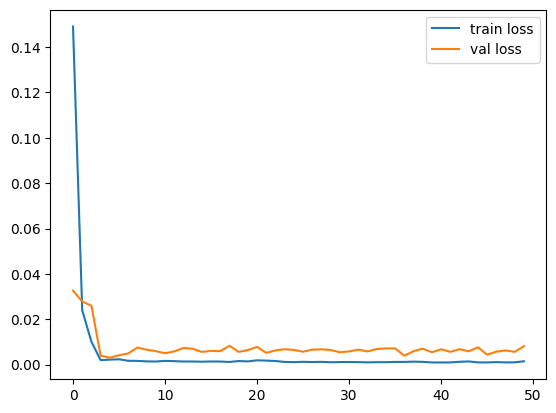

In [15]:
loss = model.history.history['loss'] ##get train loss per epoch
val_loss = model.history.history['val_loss'] ## val loss
import matplotlib.pyplot as plt
plt.plot(loss,label='train loss') ##plotting
plt.plot(val_loss,label='val loss')
plt.legend()

In [16]:
Y_pred = model.predict(test_generator) #run test data

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


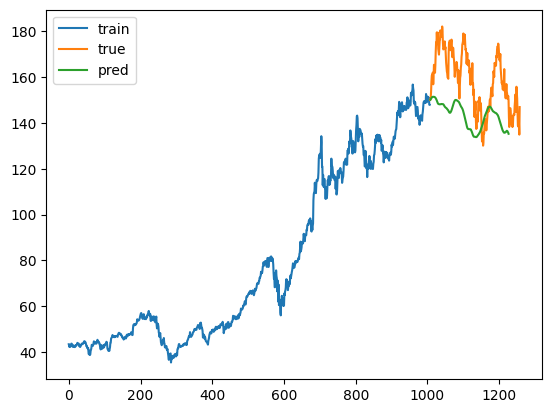

In [17]:
Y_pred_flat = Y_pred.reshape((-1))##flatten inputs
Y_pred_inv = np.zeros((len(Y_pred_flat),3))
Y_pred_inv[:,0] = Y_pred_flat
Y_pred_inv = scaler.inverse_transform(Y_pred_inv)
X_train_inv = scaler.inverse_transform(X_train)
X_test_inv = scaler.inverse_transform(X_test)

# plt.plot(np.arange(0,train_period),X_train[:,2],label='train')
# plt.plot(np.arange(train_period,train_period+len(X_test)),X_test[:,2],label='true')
# plt.plot(np.arange(train_period+1,train_period+len(Y_pred_flat)+1),Y_pred_flat,label='pred')
plt.plot(np.arange(0,train_period),X_train_inv[:,0],label='train')
plt.plot(np.arange(train_period,train_period+len(X_test)),X_test_inv[:,0],label='true')
plt.plot(np.arange(train_period+1,train_period+len(Y_pred_flat)+1),Y_pred_inv[:,0],label='pred')
plt.legend()
# plt.ylim(0, 0.1)

(251, 3)
(219,)


Text(0, 0.5, 'Predicted stock price - true stock price')

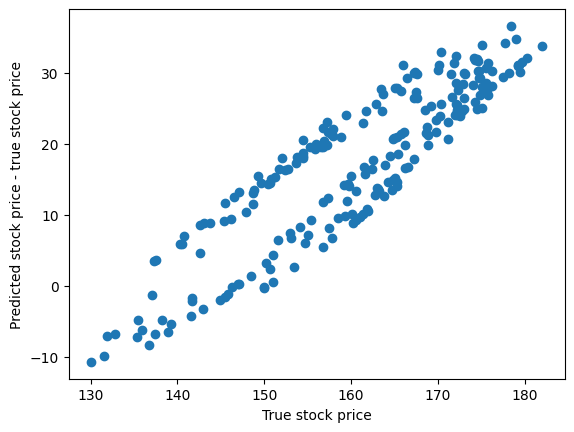

In [20]:
print(X_test.shape)
print(Y_pred_flat.shape)
plt.scatter(X_test_inv[:-look_back,0],X_test_inv[:-look_back,0] - Y_pred_inv[:,0])
plt.xlabel("True stock price")
plt.ylabel("Predicted stock price - true stock price")

# Transformer version

In [83]:
import tensorflow as tf
import numpy as np
look_back_transformer = 32 ## use last 32 days to predict next day
inputs = tf.keras.Input(shape=(look_back_transformer,1))
attn_output = tf.keras.layers.MultiHeadAttention(num_heads=3, key_dim=3)(inputs,inputs)
x = tf.keras.layers.add([inputs, attn_output])
outputs = tf.keras.layers.LayerNormalization()(x)

full_model = tf.keras.Model(inputs, outputs)
opt = tf.keras.optimizers.Adam(learning_rate=1e-3)
full_model.compile(optimizer=opt, loss='mse')
full_model.summary() #show number of parameters

Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_6       │ (None, 32, 1)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 32, 1)     │         64 │ input_layer_6[0]… │
│ (MultiHeadAttentio… │                   │            │ input_layer_6[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_6 (Add)         │ (None, 32, 1)     │          0 │ input_layer_6[0]… │
│                     │                   │            │ multi_head_atten… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 32, 1)     │          2 │ add_6[0][0]       │
│ (LayerNormalizatio… │                   │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 66 (264.00 B)

 Trainable params: 66 (264.00 B)

 Non-trainable params: 0 (0.00 B)

In [84]:
def create_dataset(data, time_step=1): ##from https://github.com/samugit83/TheGradientPath/blob/master/Keras/transformers/time_series_forecast/main_commented.py#L719
    """
    Prepares the dataset for time series forecasting.
    Converts a time series into sequences of a fixed 'time_step' length (features)
    and the next value in the series (target).
    Example:
        data = [10, 20, 30, 40, 50, 60], time_step = 3
        X (features) will be:
            [[10, 20, 30],
             [20, 30, 40],
             [30, 40, 50]]
        Y (target) will be:
            [40,
             50,
             60]
    Args:
        data (np.array): The input time series data (a single column of values).
        time_step (int): The number of past time steps to use as input features.
    Returns:
        X (np.array): Array of input sequences.
        Y (np.array): Array of target values.
    """
    X, Y = [], []
    for i in range(len(data) - time_step - 1):
        # Take 'time_step' elements as features
        X.append(data[i:(i + time_step)])
        # Take the element immediately following the feature sequence as the target
        Y.append(data[i + time_step])
    return np.array(X), np.array(Y)

In [90]:
stock_interest = 1 ## this transformer definition only uses 1D input, so we will only use 1 stock at a time
train_period = np.floor(0.8*len(X)).astype('int') ###since it's time series, use first 4 of 5 years as train
X_train_transformer = X_scaled[:train_period,stock_interest] #test-train split, be careful to formulate as predict next day of stock
X_test_transformer = X_scaled[train_period:-1,stock_interest]

X_train_batched, Y_train_batched = create_dataset(X_train_transformer,time_step=look_back_transformer)
X_train_batched = X_train_batched.reshape((X_train_batched.shape[0], X_train_batched.shape[1], 1))
X_test_batched, Y_test_batched = create_dataset(X_test_transformer,time_step=look_back_transformer)
X_test_batched = X_test_batched.reshape((X_test_batched.shape[0], X_test_batched.shape[1], 1))

In [91]:
# model.fit(train_generator_transformer, validation_data=test_generator_transformer, epochs=25)
full_model.fit(X_train_batched, Y_train_batched, validation_data=[X_test_batched,Y_test_batched], epochs=25)


Epoch 1/25
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1110 - val_loss: 0.2238
Epoch 2/25
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0839 - val_loss: 0.1850
Epoch 3/25
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0646 - val_loss: 0.1548
Epoch 4/25
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0470 - val_loss: 0.1314
Epoch 5/25
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0348 - val_loss: 0.1128
Epoch 6/25
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0270 - val_loss: 0.0977
Epoch 7/25
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0215 - val_loss: 0.0857
Epoch 8/25
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0170 - val_loss: 0.0760
Epoch 9/25
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0132 - val_loss: 0.0681
Epoch 10/25
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0110 - val_loss: 0.0615
Epoch 11/25
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0093 - val_loss: 0.0562
Epoch 12/25
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0073 - val

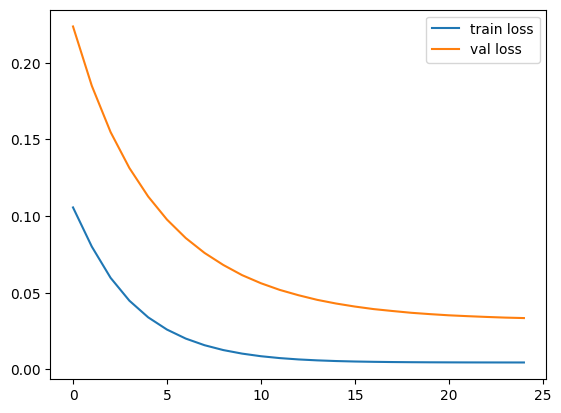

In [92]:
loss = full_model.history.history['loss'] ##get train loss per epoch
val_loss = full_model.history.history['val_loss'] ## val loss
import matplotlib.pyplot as plt
plt.plot(loss,label='train loss') ##plotting
plt.plot(val_loss,label='val loss')
plt.legend()

In [93]:
Y_pred = full_model.predict(X_test_batched) #run test data

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


In [94]:
Y_pred.shape

(218, 32, 1)

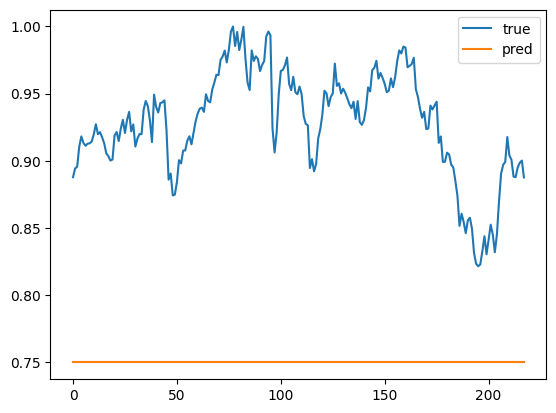

In [95]:
plt.plot(Y_test_batched.flatten(),label='true')
plt.plot(Y_pred[:,0,0],label='pred')
plt.legend()


(array([   0.,    0.,    0.,    0.,    0., 6976.,    0.,    0.,    0.,
           0.]),
 array([0.24982452, 0.34982452, 0.44982451, 0.54982454, 0.6498245 ,
        0.74982452, 0.84982455, 0.94982451, 1.04982448, 1.1498245 ,
        1.24982452]),
 <BarContainer object of 10 artists>)

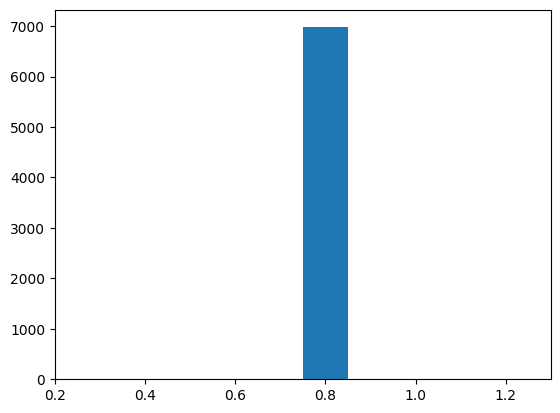

In [96]:
plt.hist(Y_pred.flatten())